In [1]:
from matplotlib import pyplot as plt
import numpy as np

Results are from 3ns simulation

during each step: 3000 * 0.002 = 6ps

step: 500 steps

In [5]:
def read_energies(filename):
    data = []
    with open(filename,'r') as f:
        lines = f.readlines()
        data_lines = lines[24:]
        for line in data_lines:
            data_i = line.split(' ')
            data.append([float(data_i[4]), float(data_i[-1][:-2])])

    return np.array(data)


In [3]:
def combine_energy(filenames):
    data = []
    for filename in filenames:
        data.append(read_energies(filename))

    return np.concatenate(data)

In [7]:
def get_traj(filename):
    with open(filename,'r') as f:
        lines = f.readlines()
        data = []
        for line in lines[34:]:
            data_i = line.split(' ')
            # print(data_i)
            data.append([float(data_i[0]), float(data_i[2])])

    return np.array(data)

In [19]:
ramas = []
for i in range(1,9):
    ramas.append(get_traj(f'replica_{i}.xvg'))

print(ramas[0].shape)

(30561, 2)


In [98]:
from scipy.constants import R
def get_landscape_from_trajs(rama, temp, bins=60):
    counts, xedge, yedge = np.histogram2d(rama[:,0], rama[:,1], bins=bins)

    energy = -np.log(counts)*R*temp*1e-3
    energy -= np.nanmin(energy)

    x_center = [(xedge[i]+xedge[i+1])/2 for i in range(len(xedge)-1)]
    y_center = [(yedge[i]+yedge[i+1])/2 for i in range(len(yedge)-1)]

    return x_center, y_center, energy.transpose()
    

/var/folders/7j/cvw70m196yv54hsvlnttb3500000gn/T/ipykernel_31390/932485820.py:5: RuntimeWarning: divide by zero encountered in log
  energy = -np.log(counts)*R*temp*1e-3


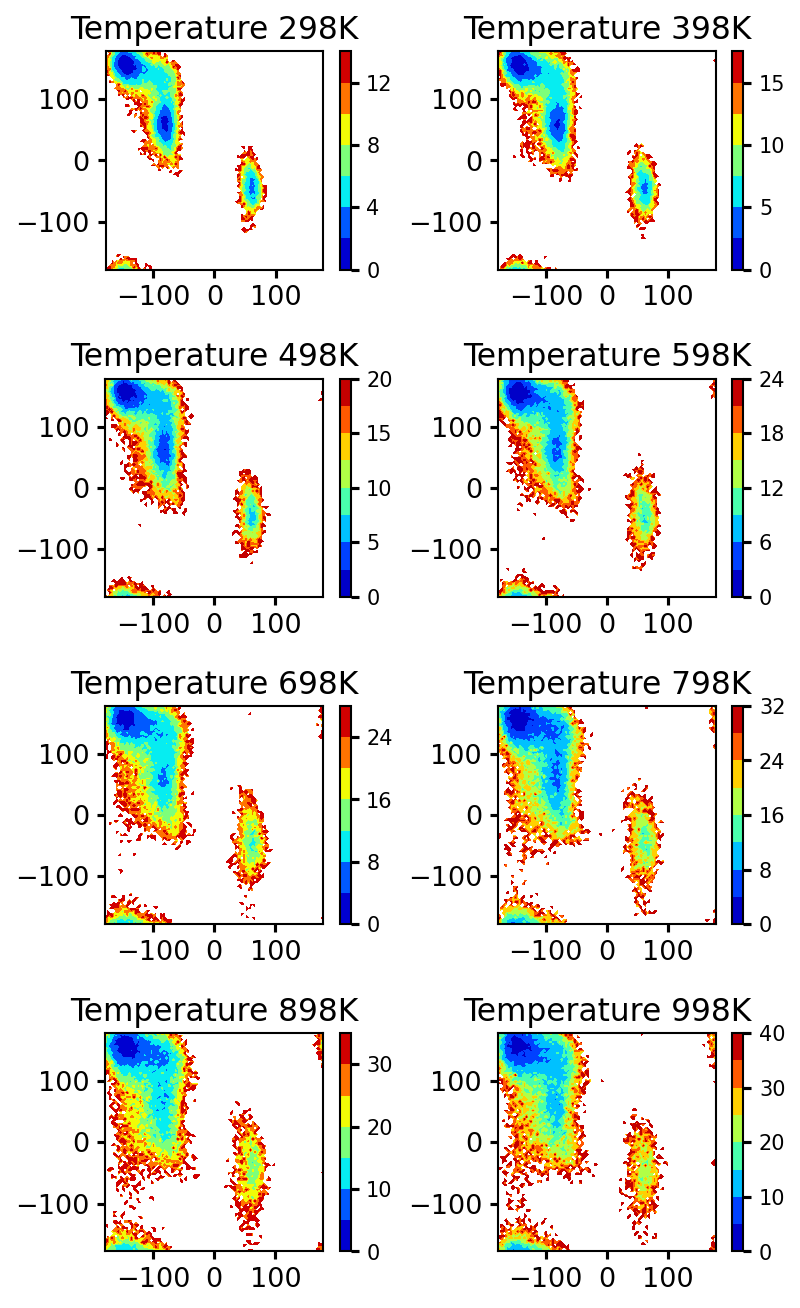

In [110]:
fig, axs = plt.subplots(4,2, dpi=150)
plt.subplots_adjust(left=0.6, right=0.9, bottom=0.1, top=0.9, wspace=0.2, hspace=0.5)
temperatures = range(298,999,100)
for i in range(4):
    for j in range(2):
        idx = int(2*i+j)
        x_center, y_center, energy = get_landscape_from_trajs(ramas[idx], temperatures[idx], bins=100)
        contour = axs[i,j].contourf(x_center, y_center, energy, cmap='jet')
        # plt.colorbar()
        axs[i,j].set_title(f'Temperature {temperatures[idx]}K', fontsize=15)
        axs[i,j].set_aspect('equal')
        axs[i,j].tick_params(axis='both', labelsize=13)
        cbar = plt.colorbar(contour, ax=axs[i, j], shrink=1.0, spacing='proportional')
        cbar.ax.tick_params(labelsize=10)
        cbar.ax.locator_params(nbins=5)
